In [18]:
pip install findspark pandas awswrangler numpy matplotlib seaborn pyspark


[notice] A new release of pip is available: 24.1.2 -> 25.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [19]:
import findspark
import pandas as pd
import awswrangler as wr
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import matplotlib.ticker as ticker
import boto3
import statistics

In [20]:
findspark.init()
df = pd.read_parquet('../../../generate data/datasets/general/')


In [21]:
df_models = df[df["partCodeId"].str.len() == 7]

df_models["formula_result"] = (df_models["dfQuantity"] - df_models["actualQuantity"]).abs() / df_models["actualQuantity"]
# Group by the correct columns
df_models_result = df_models.groupby([
    "partCodeId",
    "vehicleModelId",
    "forecastDistance",
]).agg(
    final_result=("formula_result", "mean"),
).reset_index()

# Calculate statistics
average = df_models_result["final_result"].mean()
mode = df_models_result["final_result"].mode()[0]
median = df_models_result["final_result"].median()

print(f"Average: {average}")
print(f"Mode: {mode}")
print(f"Median: {median}")


Average: 0.12230741113492209
Mode: 0.005849207247450177
Median: 0.11279531590977943


/var/folders/x0/w5vkfm815t50y972318hw4880000gq/T/ipykernel_39179/2732708336.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_models["formula_result"] = (df_models["dfQuantity"] - df_models["actualQuantity"]).abs() / df_models["actualQuantity"]
/var/folders/x0/w5vkfm815t50y972318hw4880000gq/T/ipykernel_39179/2732708336.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_models_result = df_models.groupby([


In [22]:
df_fullpc = df[df["partCodeId"].str.len() > 7]

df_fullpc["formula_result"] = (df_fullpc["dfQuantity"] - df_fullpc["actualQuantity"]).abs() / df_fullpc["actualQuantity"]
# Group by the correct columns
df_fullpc_result = df_fullpc.groupby([
    "partCodeId",
    "vehicleModelId",
    "forecastDistance",
]).agg(
    final_result=("formula_result", "mean"),
).reset_index()

# Calculate statistics
average = df_fullpc_result["final_result"].mean()
mode = df_fullpc_result["final_result"].mode()[0]
median = df_fullpc_result["final_result"].median()

print(f"Average: {average}")
print(f"Mode: {mode}")
print(f"Median: {median}")


KeyboardInterrupt: 

In [ ]:
df_nocolorpc = df[df["partCodeId"].str.len() > 7]
df_nocolorpc["partCodeId"] = df_nocolorpc["partCodeId"].str[:11]
df_nocolorpc["formula_result"] = (df_nocolorpc["dfQuantity"] - df_nocolorpc["actualQuantity"]).abs() / df_nocolorpc["actualQuantity"]
# Group by the correct columns
df_nocolorpc_result = df_nocolorpc.groupby([
    "partCodeId",
    "vehicleModelId",
    "forecastDistance",
]).agg(
    final_result=("formula_result", "mean"),
).reset_index()

# Calculate statistics
average = df_nocolorpc_result["final_result"].mean()
mode = df_nocolorpc_result["final_result"].mode()[0]
median = df_nocolorpc_result["final_result"].median()

print(f"Average: {average}")
print(f"Mode: {mode}")
print(f"Median: {median}")


/var/folders/x0/w5vkfm815t50y972318hw4880000gq/T/ipykernel_39179/3902456604.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nocolorpc["partCodeId"] = df_nocolorpc["partCodeId"].str[:11]
/var/folders/x0/w5vkfm815t50y972318hw4880000gq/T/ipykernel_39179/3902456604.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nocolorpc["formula_result"] = (df_nocolorpc["dfQuantity"] - df_nocolorpc["actualQuantity"]).abs() / df_nocolorpc["actualQuantity"]
/var/folders/x0/w5vkfm815t50y972318hw4880000gq/T/ipykerne

Average: 0.4033918986564695
Mode: 0.00013724118137373254
Median: 0.40410400971908


In [ ]:
df_nocolornoindexpc = df[df["partCodeId"].str.len() > 7]
df_nocolornoindexpc["partCodeId"] = df_nocolornoindexpc["partCodeId"].str[:10]
df_nocolornoindexpc["formula_result"] = (df_nocolornoindexpc["dfQuantity"] - df_nocolornoindexpc["actualQuantity"]).abs() / df_nocolornoindexpc["actualQuantity"]
# Group by the correct columns
df_nocolornoindexpc_result = df_nocolornoindexpc.groupby([
    "partCodeId",
    "vehicleModelId",
    "forecastDistance",
]).agg(
    final_result=("formula_result", "mean"),
).reset_index()

# Calculate statistics
average = df_nocolornoindexpc_result["final_result"].mean()
mode = df_nocolornoindexpc_result["final_result"].mode()[0]
median = df_nocolornoindexpc_result["final_result"].median()

print(f"Average: {average}")
print(f"Mode: {mode}")
print(f"Median: {median}")

/var/folders/x0/w5vkfm815t50y972318hw4880000gq/T/ipykernel_39179/3871617970.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nocolornoindexpc["partCodeId"] = df_nocolornoindexpc["partCodeId"].str[:10]
/var/folders/x0/w5vkfm815t50y972318hw4880000gq/T/ipykernel_39179/3871617970.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nocolornoindexpc["formula_result"] = (df_nocolornoindexpc["dfQuantity"] - df_nocolornoindexpc["actualQuantity"]).abs() / df_nocolornoindexpc["actualQuantity"]
/var/folders/x0

Average: 0.39965591535506356
Mode: 0.037037393985118884
Median: 0.39639844646306155


In [ ]:
df_ics = df[df["partCodeId"].str.len() > 7]
df_ics["numberOfInstallationConditions"] = df_ics["numberOfInstallationConditions"].astype(int)
df_ics["formula_result"] = (df_ics["dfQuantity"] - df_ics["actualQuantity"]).abs() / df_ics["actualQuantity"]
# Group by the correct columns
df_ics_result = df_ics.groupby([
    "partCodeId",
    "vehicleModelId",
    "numberOfInstallationConditions",
    "forecastDistance",
]).agg(
    final_result=("formula_result", "mean"),
).reset_index()

# Calculate statistics
average = df_ics_result["final_result"].mean()
mode = df_ics_result["final_result"].mode()[0]
median = df_ics_result["final_result"].median()

print(f"Average: {average}")
print(f"Mode: {mode}")
print(f"Median: {median}")

/var/folders/x0/w5vkfm815t50y972318hw4880000gq/T/ipykernel_39179/984145577.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ics["numberOfInstallationConditions"] = df_ics["numberOfInstallationConditions"].astype(int)
/var/folders/x0/w5vkfm815t50y972318hw4880000gq/T/ipykernel_39179/984145577.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ics["formula_result"] = (df_ics["dfQuantity"] - df_ics["actualQuantity"]).abs() / df_ics["actualQuantity"]
/var/folders/x0/w5vkfm815t50y972318hw4880000gq/T/ipy

KeyboardInterrupt: 

/var/folders/x0/w5vkfm815t50y972318hw4880000gq/T/ipykernel_29869/1398057272.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  seaborn.lineplot(data=df_models_result, x="forecastDistance", y="final_result", label="Models", ci=None)
/var/folders/x0/w5vkfm815t50y972318hw4880000gq/T/ipykernel_29869/1398057272.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  seaborn.lineplot(data=df_fullpc_result, x="forecastDistance", y="final_result", label="Full PC", ci=None)
/var/folders/x0/w5vkfm815t50y972318hw4880000gq/T/ipykernel_29869/1398057272.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  seaborn.lineplot(data=df_nocolorpc_result, x="forecastDistance", y="final_result", label="No Color PC", ci=None)
/var/folders/x0/w5vkfm815t50y972318hw4880000gq/T/ipykernel_29869/1398057272.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorba

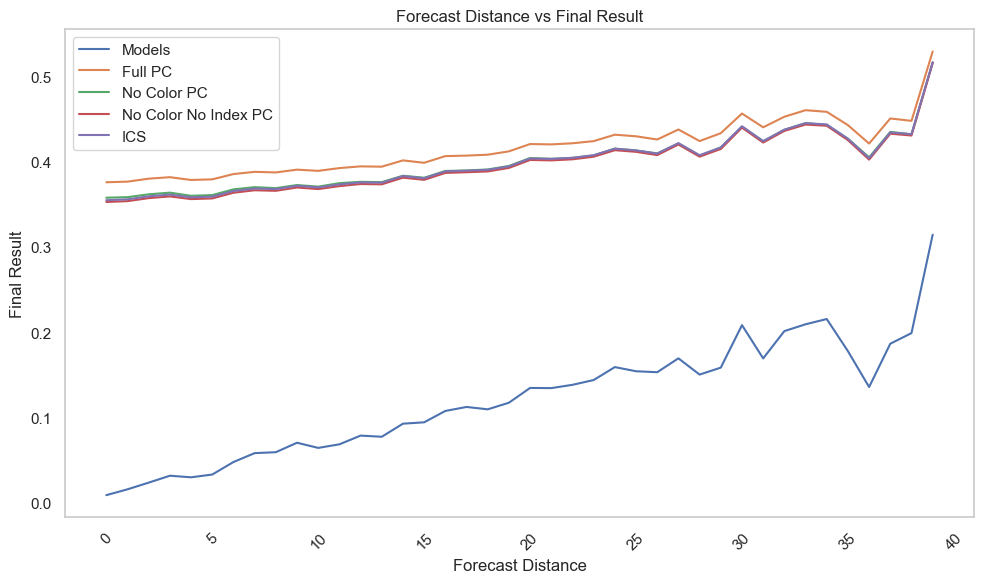

In [ ]:
plt.figure(figsize=(10, 6))
seaborn.set(style="whitegrid")
plt.title("Forecast Distance vs Final Result")
plt.xlabel("Forecast Distance")
plt.ylabel("Final Result")
seaborn.lineplot(data=df_models_result, x="forecastDistance", y="final_result", label="Models", ci=None)
seaborn.lineplot(data=df_fullpc_result, x="forecastDistance", y="final_result", label="Full PC", ci=None)
seaborn.lineplot(data=df_nocolorpc_result, x="forecastDistance", y="final_result", label="No Color PC", ci=None)
seaborn.lineplot(data=df_nocolornoindexpc_result, x="forecastDistance", y="final_result", label="No Color No Index PC", ci=None)
seaborn.lineplot(data=df_ics_result, x="forecastDistance", y="final_result", label="ICS", ci=None)
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()